# **Target SQL Business Case**

**Context:**
Target is a globally renowned brand and a prominent retailer in the United States. Target makes itself a preferred shopping destination by offering outstanding value, inspiration, innovation, and an exceptional guest experience that no other retailer can deliver.

This business case focuses on the operations of Target in Brazil and provides insightful information about 100,000 orders placed between 2016 and 2018. The dataset offers a comprehensive view of various dimensions including the order status, price, payment and freight performance, customer location, product attributes, and customer reviews.

**Problem Statement:**
Assuming you are a data analyst/ scientist at Target, you have been assigned the task of analysing the given dataset to extract valuable insights and provide actionable recommendations.


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
sql_target_brazil = 'sql-project-1-386905'

In [4]:
from google.cloud import bigquery

In [5]:
client = bigquery.Client(project = sql_target_brazil)

# **Exploratory analysis:**

1. Data type of columns in a table

2. Time period for which the data is given

3. Cities and States of customers ordered during the given period

In [6]:
client.query("""

SELECT TABLE_NAME, COLUMN_NAME, DATA_TYPE
FROM retailers_data.INFORMATION_SCHEMA.COLUMNS
order by 1

""").to_dataframe()

,TABLE_NAME,COLUMN_NAME,DATA_TYPE
0,brazil,customer_state,STRING
1,brazil,State,STRING
2,brazil,Region,STRING
3,customers,customer_id,STRING
4,customers,customer_unique_id,STRING
5,customers,customer_zip_code_prefix,INT64
6,customers,customer_city,STRING
7,customers,customer_state,STRING
8,order_items,order_id,STRING
9,order_items,order_item_id,INT64


In [7]:
client.query("""

select max(order_purchase_timestamp),min(order_purchase_timestamp)
from `retailers_data.orders`;

""").to_dataframe()

,f0_,f1_
0,2018-10-17 17:30:18+00:00,2016-09-04 21:15:19+00:00


Time period for the available data is: from September-2016 to October-2018

In [34]:
client.query("""

select count(distinct(customer_id)) as No_of_customers_data
from `retailers_data.customers` cus ;

""").to_dataframe()

,No_of_customers_data
0,99441


In [33]:
client.query("""

select count(distinct(customer_unique_id)) as No_of_unique_customers
from `retailers_data.customers` cus ;

""").to_dataframe()

,No_of_unique_customers
0,96096


In [31]:
client.query("""

select distinct(customer_city)
from `retailers_data.customers` cus
order by 1;

""").to_dataframe()

,customer_city
0,abadia dos dourados
1,abadiania
2,abaete
3,abaetetuba
4,abaiara
...,...
4114,xinguara
4115,xique-xique
4116,zacarias
4117,ze doca


In [30]:
client.query("""

select distinct(customer_state)
from `retailers_data.customers` cus
order by 1;

""").to_dataframe()

,customer_state
0,AC
1,AL
2,AM
3,AP
4,BA
5,CE
6,DF
7,ES
8,GO
9,MA


There are 4119 cities and 27 states in total in this dataset.

# **In-depth Exploration:**

1. Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?

2. What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?

In [9]:
df_1 = client.query("""

select extract(year from order_purchase_timestamp) as year,
       extract(month from order_purchase_timestamp) as month, count(distinct(order_id)) as count_of_orders
from `retailers_data.orders`
group by 1,2
order by 1,2;

""").to_dataframe()
df_1

,year,month,count_of_orders
0,2016,9,4
1,2016,10,324
2,2016,12,1
3,2017,1,800
4,2017,2,1780
5,2017,3,2682
6,2017,4,2404
7,2017,5,3700
8,2017,6,3245
9,2017,7,4026


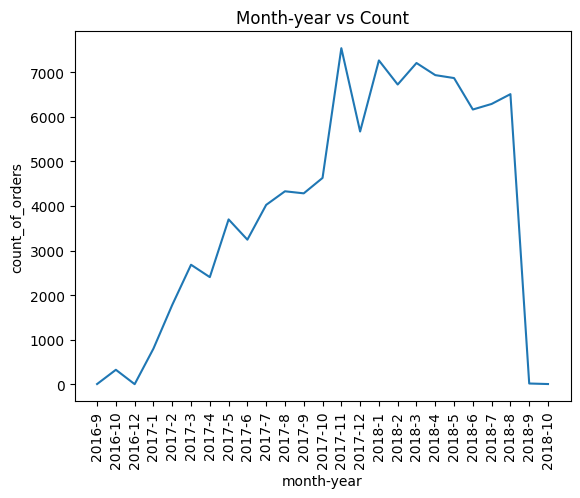

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_1['month-year'] = df_1['year'].astype('str') + '-' + df_1['month'].astype('str')


sns.lineplot(data=df_1, x='month-year', y='count_of_orders')
plt.xticks(rotation =90)
plt.title('Month-year vs Count' )
plt.show()


**Insights from the trend shown above:**

1) There is growing trend in orders in year 2017 and we can observe a peak in
November month due to Black Friday season and then there is a dip in
December as it’s a after festive month.

2) In year 2018, there is sustenance in trend till August and then there is huge
fall in orders in September and October months.

3) Huge fall may be due to following reasons:

*Economic slowdown:* Brazil's economy was slowing down in 2018, which led
to a decrease in consumer spending. This might be the main reason for
Target's revenue decline.

*Competition:* Increasing competition from other retailers in Brazil, such as Walmart and Lojas Americanas may have also played a role in the revenue decline.

*Seasonal factors:* September and October are typically slower months for retail sales in Brazil, as many people are saving money for the holidays.

**Recommendations:**

1) For low growing months, discounts can be given for low running products to increase the sales. This could include offering buy-one-get-one-free deals, coupons, or sales.

2) Marketing and advertising efforts can be increased during low-growing months to attract more customers. This could include running TV commercials, online ads, or print ads.

3) Inventory should be increased for festival seasons, so every customer gets what they order quickly.

4) Free shipping should be provided for festive seasons to increase the sales.

In [36]:
client.query("""

select region, count(*) as no_of_orders
from `retailers_data.brazil` b
inner join `retailers_data.customers` cus
on b.customer_state = cus.customer_state
group by 1
order by 2 desc

""").to_dataframe()

,region,no_of_orders
0,Southeast,68266
1,South,14148
2,Northeast,9394
3,Center West,5782
4,North,1851


83% of the customers are southeast

14.2% of the customers are from south

In total 83% of customers are southeast and south of the brazil.

In [11]:
df_3 = client.query("""

select case when cast(order_purchase_timestamp as time) between '00:00:00' and '05:59:59' then "Dawn"
            when cast(order_purchase_timestamp as time) between '06:00:00' and '11:59:59' then "Morning"
            when cast(order_purchase_timestamp as time) between '12:00:00' and '15:59:59' then "Noon"
            when cast(order_purchase_timestamp as time) between '16:00:00' and '20:59:59' then "Evening"
            when cast(order_purchase_timestamp as time) between '21:00:00' and '23:59:59' then "Night"
            end as type_of_hour,
            count(*) as no_of_orders
from `retailers_data.orders`
group by 1
order by 2 desc;

""").to_dataframe()

df_3

,type_of_hour,no_of_orders
0,Evening,30769
1,Noon,25536
2,Morning,22240
3,Night,16156
4,Dawn,4740


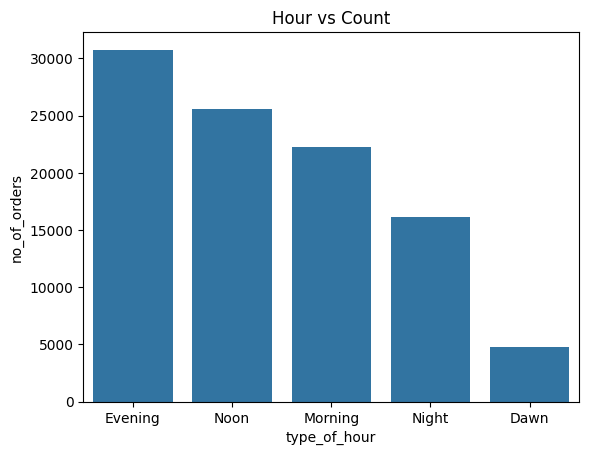

In [12]:
sns.barplot(data=df_3,x='type_of_hour',y='no_of_orders')
plt.title('Hour vs Count' )
plt.show()

**Insights:**

1) Brazilian people buy products more in evening time: 4 PM - 9PM. Target stores are typically open until 10pm, which gives Brazilians more time to shop after work or school.

2) But it is also partly due to culture. Brazilians often see shopping as a social activity, and they enjoy spending time with friends and family while they shop.

# **Evolution of E-commerce orders in the Brazil region:**

1. Get month on month orders by states.

2. Distribution of customers across the states in Brazil

In [13]:
df_2 = client.query("""

select * , round(100*((no_of_orders - pre_month_orders)/pre_month_orders),2) as mon_over_mon_change
from

(select *,lag(no_of_orders,1) over(partition by customer_state order by year,month) as pre_month_orders
from
(select customer_state,extract(year from order_purchase_timestamp) as year ,
        extract(month from order_purchase_timestamp) as month,
        count(*) as no_of_orders
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
group by 1,2,3 order by 1,2,3 )

where year in (2017,2018)
order by 1,2,3);

""").to_dataframe()
df_2

,customer_state,year,month,no_of_orders,pre_month_orders,mon_over_mon_change
0,AC,2017,1,2,<NA>,NaN
1,AC,2017,2,3,2,50.00
2,AC,2017,3,2,3,-33.33
3,AC,2017,4,5,2,150.00
4,AC,2017,5,8,5,60.00
...,...,...,...,...,...,...
535,TO,2018,4,19,20,-5.00
536,TO,2018,5,16,19,-15.79
537,TO,2018,6,18,16,12.50
538,TO,2018,7,22,18,22.22


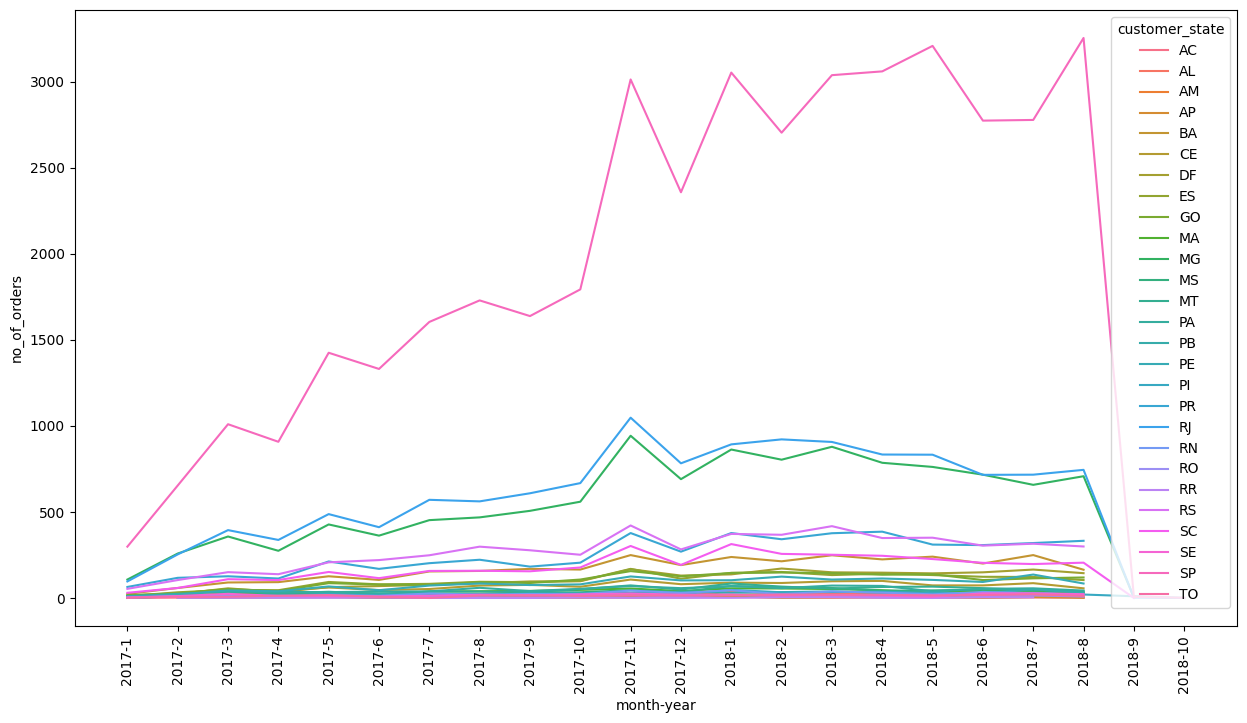

In [14]:
df_2['month-year'] = df_2['year'].astype('str') + '-' + df_2['month'].astype('str')
df_2.head()

plt.figure(figsize=(15,8))
sns.lineplot(data=df_2, x='month-year',y='no_of_orders', hue='customer_state')
plt.xticks(rotation=90)
plt.show()

In [15]:
client.query("""

select customer_state, count(distinct(customer_id)) as no_of_customers
from `retailers_data.customers`
group by 1
order by 2 desc;

""").to_dataframe()

,customer_state,no_of_customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


**Insights:**

1) Orders have been received from total 27 states according to the given data.

2) Highest revenue state is SP (São Paulo) in Brazil.

3) 2nd and 3rd highest revenue states are RJ (Rio de Janeiro) and MG (Minas Gerais) respectively.

4) These states have the largest populations and the highest per capita incomes in Brazil.

5) These states are home to many middle-class and upper-class consumers. These consumers are more likely to shop at Target than lower-income consumers.

6) Also, these states are home to many urban areas. Urban areas tend to have higher sales than rural areas. This means that there are more potential customers for Target in these states.

7) Month over month analysis trend is similar for all the states.

8) In the M-O-M analysis, peaks are observed in months of May, July, November in year 2017 and January in year 2018.

**Few reasons why sales may be increasing in May, July, and November in Brazil**

***School supplies:*** May is the beginning of the school year in Brazil, so there is an increased demand for school supplies. Target is a popular destination for school supplies, as it offers a wide variety of products at competitive prices.

***Back-to-school clothing:*** July is also a popular time for back-to-school shopping. Target carries a wide variety of back-to-school clothing for all ages, from casual to formal wear.

***Holiday shopping:*** November is the month of Black Friday and Cyber Monday, two of the biggest shopping days of the year. Target is a popular destination for holiday shopping, as it offers deep discounts on a wide variety of products.

In addition to these seasonal factors, Target may also be experiencing increased sales in Brazil due to its strong brand reputation and its commitment to providing excellent customer service. Target is known for its wide selection of products, its competitive prices, and its convenient shopping experience.

These factors make Target a popular choice for shoppers in Brazil.

**Recommendations:**

**To cater increase customer traffic during holiday season following points can help:**

**Inventory:** Inventory levels should be increased in anticipation of higher demand during the festive season. This ensures that it has enough products on hand to meet customer demand.

**Hiring temporary workers:** Temporary workers should be hired during the festive season to help with the increased customer traffic. This helps to handle the increased demand and provide a positive shopping experience for its customers.

**Providing training:** Training should be provided to the employees on how to handle the increased customer traffic and how to provide excellent customer service.

**Logistics:** Company should work with its suppliers to ensure that it has a reliable supply chain in place to meet the increased demand. This ensures that products are delivered to stores on time and in good condition.

**Marketing:** Company should have marketing campaigns to promote its products and sales during the festive season. This helps to generate excitement and drive sales.

**Using technology:** Company should improve the shopping experience for its customers during the festive season. This could include things like self-checkout machines, mobile apps, or contactless payments.

# **Impact on Economy:**

Analyse the money movement by e-commerce by looking at order prices, freight and others:

1. Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only) - You can use “payment_value” column in payments table.

2. Mean & Sum of price and freight value by customer state.

In [16]:
client.query("""

select * , round(100*((cost - prev_year_cost)/prev_year_cost),2) as cost_increase
from
    (select *, lag(cost,1) over(order by year) as prev_year_cost
    from
        (select year,sum (cost_to_customer) as cost
        from (select extract(year from order_purchase_timestamp) as year,
                     extract(month from order_purchase_timestamp) as month,
                     sum(payment_value) as cost_to_customer
                     from `retailers_data.orders` ord
                     inner join `retailers_data.order_payments` pay
                     on ord.order_id = pay.order_id
                     group by 1,2 order by 1,2)
        where year in (2017,2018) and month between 1 and 8
        group by 1 order by 1))

""").to_dataframe()

,year,cost,prev_year_cost,cost_increase
0,2017,3669022.12,NaN,NaN
1,2018,8694733.84,3669022.12,136.98


Increase in the cost from 2017 to 2018 for months Jan-Aug is 136.98 %

**Increase in Target's revenue from 2017 to 2018 may be due to:**

**Increased online sales:** Target could have invested heavily in its online business, and this could have led to an increase in online sales.

**Expanded product selection:** Company could have expanded its product selection, and this could have made it a more attractive destination for shoppers. Company offers a wide range of products, including groceries, electronics, and home goods.

**Improved customer service:** Company must have improved its customer service which could have made shoppers more. It could have made changes to its stores to make shopping more convenient for customers.

In [17]:
client.query("""

select customer_state, round(sum(price),2) as state_total_price,
       round(avg(price),2) as state_mean_price ,
       round(sum(freight_value),2) as state_total_frieght,
       round(avg(freight_value),2) as state_mean_freight
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
inner join `retailers_data.order_items` item
on ord.order_id = item.order_id
group by 1
order by 2 desc,4 desc;

""").to_dataframe()

,customer_state,state_total_price,state_mean_price,state_total_frieght,state_mean_freight
0,SP,5202955.05,109.65,718723.07,15.15
1,RJ,1824092.67,125.12,305589.31,20.96
2,MG,1585308.03,120.75,270853.46,20.63
3,RS,750304.02,120.34,135522.74,21.74
4,PR,683083.76,119.00,117851.68,20.53
5,SC,520553.34,124.65,89660.26,21.47
6,BA,511349.99,134.60,100156.68,26.36
7,DF,302603.94,125.77,50625.50,21.04
8,GO,294591.95,126.27,53114.98,22.77
9,ES,275037.31,121.91,49764.60,22.06


**Insights:**

1) Orders have been received from total 27 states according to the given data.

2) Highest revenue state is SP (São Paulo) in Brazil.

3) 2nd and 3rd highest revenue states are RJ (Rio de Janeiro) and MG (Minas Gerais) respectively.

4) These states have the largest populations and the highest per capita incomes in Brazil.

5) These states are home to many middle-class and upper-class consumers. These consumers are more likely to shop at Target than lower-income consumers.

6) Also, these states are home to many urban areas. Urban areas tend to have higher sales than rural areas. This means that there are more potential customers for Target in these states.

# **Analysis on sales, freight and delivery time:**

1. Calculate days between purchasing, delivering and estimated delivery

2. Find time_to_delivery & diff_estimated_delivery. Formula for the same given below: o time_to_delivery = order_delivered_customer_date-order_purchase_timestamp o diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date

3. Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery

4. Sort the data to get the following:

5. Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5

6. Top 5 states with highest/lowest average time to delivery

7. Top 5 states where delivery is really fast/ not so fast compared to estimated date

In [18]:
# order_id vs days_to_deliver
client.query("""

select order_id, date_diff(order_delivered_customer_date,order_purchase_timestamp,day) as days_to_deliver,
       date_diff(order_estimated_delivery_date,order_purchase_timestamp,day) as estimated_days_to_deliver,
       date_diff(order_estimated_delivery_date,order_delivered_customer_date,day) as early_delivery_by_days
from `retailers_data.orders`
order by 1

""").to_dataframe()

,order_id,days_to_deliver,estimated_days_to_deliver,early_delivery_by_days
0,00010242fe8c5a6d1ba2dd792cb16214,7,15,8
1,00018f77f2f0320c557190d7a144bdd3,16,18,2
2,000229ec398224ef6ca0657da4fc703e,7,21,13
3,00024acbcdf0a6daa1e931b038114c75,6,11,5
4,00042b26cf59d7ce69dfabb4e55b4fd9,25,40,15
...,...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,17,24,7
99437,fffcd46ef2263f404302a634eb57f7eb,9,17,8
99438,fffce4705a9662cd70adb13d4a31832d,4,17,12
99439,fffe18544ffabc95dfada21779c9644f,1,10,8


In [19]:
# Customer_state vs days_to_deliver
client.query("""

select customer_state,
       round(avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,day)),2) as days_to_deliver
from `retailers_data.orders` ord
inner join `retailers_data.customers` cus
on ord.customer_id = cus.customer_id
group by 1
order by 2;

""").to_dataframe()

,customer_state,days_to_deliver
0,SP,8.30
1,PR,11.53
2,MG,11.54
3,DF,12.51
4,SC,14.48
5,RS,14.82
6,RJ,14.85
7,GO,15.15
8,MS,15.19
9,ES,15.33


**Insights:**
1) Average no. of days to deliver an order is 12 days.

2) Average estimated no. of days to deliver is 23 days.

3) Company is delivering early by 11 days on an average for an order.

4) In SP state delivery (8 days) faster than other states.

**This might be due to following reasons:**

**Population:** SP is the most populous state in Brazil, with over 46 million people. This means that more customers less time to deliver to.

**Infrastructure:** SP has a more developed infrastructure than other states in Brazil. This means that there are better roads, more warehouses, and more delivery drivers in SP.

**Competition:** There are more e-commerce companies operating in SP than in other states in Brazil. This means that the company has to compete with other companies to deliver products quickly.

5)  In PR, MG and DF states average no. of days to deliver is 12 days. These states are on the 2nd rank for faster delivery.

6) In RR state delivery is the slowest which 29 days.

In [20]:
client.query("""

select order_id, date_diff(order_delivered_customer_date,order_purchase_timestamp,day) as days_to_deliver,
       date_diff(order_estimated_delivery_date,order_delivered_customer_date,day) as early_delivery_by_days
from `retailers_data.orders`
order by 1

""").to_dataframe()

,order_id,days_to_deliver,early_delivery_by_days
0,00010242fe8c5a6d1ba2dd792cb16214,7,8
1,00018f77f2f0320c557190d7a144bdd3,16,2
2,000229ec398224ef6ca0657da4fc703e,7,13
3,00024acbcdf0a6daa1e931b038114c75,6,5
4,00042b26cf59d7ce69dfabb4e55b4fd9,25,15
...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,17,7
99437,fffcd46ef2263f404302a634eb57f7eb,9,8
99438,fffce4705a9662cd70adb13d4a31832d,4,12
99439,fffe18544ffabc95dfada21779c9644f,1,8


In [21]:
client.query("""

select customer_state, round(avg(freight_value),2) as state_mean_freight,
       round(avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,day)),2) as avg_days_to_deliver,
       round(avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,day)),2) as avg_estimate_days_delivery
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
inner join `retailers_data.order_items` item
on ord.order_id = item.order_id
group by 1
order by 1;

""").to_dataframe()

,customer_state,state_mean_freight,avg_days_to_deliver,avg_estimate_days_delivery
0,AC,40.07,20.33,20.01
1,AL,35.84,23.99,7.98
2,AM,33.21,25.96,18.98
3,AP,34.01,27.75,17.44
4,BA,26.36,18.77,10.12
5,CE,32.71,20.54,10.26
6,DF,21.04,12.50,11.27
7,ES,22.06,15.19,9.77
8,GO,22.77,14.95,11.37
9,MA,38.26,21.20,9.11


**Insights:**

1) SP state has lowest freight value.

2) PR, MG and RJ have the 2nd lowest freight value.

3) RR has the highest freight value.

4) This data is similar to days_to_deliver. This implies that freight value has relation with delivery time.

In [22]:
client.query("""

select customer_state, round(avg(freight_value),2) as state_mean_freight
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
inner join `retailers_data.order_items` item
on ord.order_id = item.order_id
group by 1
order by 2 desc
limit 5;

""").to_dataframe()

,customer_state,state_mean_freight
0,RR,42.98
1,PB,42.72
2,RO,41.07
3,AC,40.07
4,PI,39.15


In [23]:
client.query("""

select customer_state, round(avg(freight_value),2) as state_mean_freight
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
inner join `retailers_data.order_items` item
on ord.order_id = item.order_id
group by 1
order by 2 asc
limit 5;

""").to_dataframe()

,customer_state,state_mean_freight
0,SP,15.15
1,PR,20.53
2,MG,20.63
3,RJ,20.96
4,DF,21.04


In [24]:
client.query("""

select customer_state,
       round(avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,day)),2) as avg_days_to_deliver
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
inner join `retailers_data.order_items` item
on ord.order_id = item.order_id
group by 1
order by 2 desc
limit 5;

""").to_dataframe()

,customer_state,avg_days_to_deliver
0,RR,27.83
1,AP,27.75
2,AM,25.96
3,AL,23.99
4,PA,23.30


In [25]:
client.query("""

select customer_state,
       round(avg(date_diff(order_delivered_customer_date,order_purchase_timestamp,day)),2) as avg_days_to_deliver
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
inner join `retailers_data.order_items` item
on ord.order_id = item.order_id
group by 1
order by 2 asc
limit 5;

""").to_dataframe()

,customer_state,avg_days_to_deliver
0,SP,8.26
1,PR,11.48
2,MG,11.52
3,DF,12.50
4,SC,14.52


In [26]:
client.query("""

select customer_state,
       round(avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,day)),2) as early_delivery_by_days
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
inner join `retailers_data.order_items` item
on ord.order_id = item.order_id
group by 1
order by 2 desc
limit 5;

""").to_dataframe()

,customer_state,early_delivery_by_days
0,AC,20.01
1,RO,19.08
2,AM,18.98
3,AP,17.44
4,RR,17.43


In [27]:
client.query("""

select customer_state,
       round(avg(date_diff(order_estimated_delivery_date,order_delivered_customer_date,day)),2) as early_delivery_by_days
from `retailers_data.customers` cus
inner join `retailers_data.orders` ord
on cus.customer_id = ord.customer_id
inner join `retailers_data.order_items` item
on ord.order_id = item.order_id
group by 1
order by 2 asc
limit 5;

""").to_dataframe()

,customer_state,early_delivery_by_days
0,AL,7.98
1,MA,9.11
2,SE,9.17
3,ES,9.77
4,BA,10.12


# **Payment type analysis:**

1. Month over Month count of orders for different payment types

2. Count of orders based on the no. of payment instalments

In [28]:
client.query("""

select *,round((100*(no_of_orders-prev_mon_orders)/prev_mon_orders),2) as M_O_M_increase
from
    (select *,lag(no_of_orders,1) over(partition by payment_type order by year,month) as prev_mon_orders
    from
        (select payment_type,
                extract(year from order_purchase_timestamp) as year,
                extract(month from order_purchase_timestamp) as month,
                count(distinct(pay.order_id)) as no_of_orders
        from `retailers_data.orders` ord
        inner join `retailers_data.order_payments` pay
        on ord.order_id = pay.order_id
        group by 1,2,3
        order by 1,2,3 )
    where year in (2017,2018) order by 1,2,3)

""").to_dataframe()

,payment_type,year,month,no_of_orders,prev_mon_orders,M_O_M_increase
0,boleto,2017,1,197,<NA>,NaN
1,boleto,2017,2,398,197,102.03
2,boleto,2017,3,590,398,48.24
3,boleto,2017,4,496,590,-15.93
4,boleto,2017,5,772,496,55.65
...,...,...,...,...,...,...
79,voucher,2018,6,231,203,13.79
80,voucher,2018,7,212,231,-8.23
81,voucher,2018,8,232,212,9.43
82,voucher,2018,9,15,232,-93.53


**Insights:**

1) Revenue trend for different payment-types: credit card > UPI > Voucher > Debit card

2) Highest revenue has gained through credit card.

3) M-O-M trend for Credit-card, UPI and Voucher payment types is almost similar i.e. month growth is almost same for them.

4) But debit card has a huge peak in 2018 June.

In [29]:
client.query("""

select payment_installments, count(distinct(order_id)) as no_of_orders
from `retailers_data.order_payments`
group by 1
order by 1

""").to_dataframe()

,payment_installments,no_of_orders
0,0,2
1,1,49060
2,2,12389
3,3,10443
4,4,7088
5,5,5234
6,6,3916
7,7,1623
8,8,4253
9,9,644


**Insights:**

1) Most of the people pay in one instalment.

2) Paying in one instalment is simply more convenient for many people. They don’t have to worry about remembering to make payments on time or incurring interest charges. Additionally, paying in one instalment can help people to stay on budget and avoid overspending.

3) EMIs typically have higher interest rates than paying in one instalment. This can make it more expensive to buy items on EMI.

4) Brazilians are generally more distrustful of debt than people in other countries. This may be due to the fact that Brazil has a history of hyperinflation, which made debt more difficult to repay.